# Using NumPy, matplotlib and SciPy
## Tutorial 1, Exercise 1: Image manipulation

The goal of this exercise is for you to become familiar with the important
packages NumPy (for n-dimensional array manipulations) and matplotlib (for
MATLAB-like plotting and visualization).
Your task is to load a provided image into a NumPy array and do some basic
manipulations.

You need to replace the ``???`` in the code with the required commands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import scipy.interpolate as inter

In [2]:
plt.ion()

Use ``plt.imread`` to read in ``'tree.jpg'`` as numpy array, select
only the red channel. Check the image dimensions with img.shape.
``img_red`` should contain a 2-dimensional array.
Please note that this is actually a gray scale image and all three
image channels are the same.

In [3]:
img = plt.imread('tree.jpg')
print(img.shape)

(640, 640, 3)


In [4]:
img_red = img[:,:,1]
img_red.shape

(640, 640)

Show ``img_red`` with ``plt.imshow``:

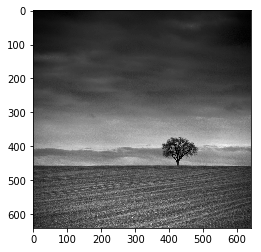

In [5]:
plt.figure(1)
plt.imshow(img_red, cmap='gray')

Using ``plt.imread``, the image values returns unsigned integers between 0 and 255.
**Add a colorbar** to verify the range of values:

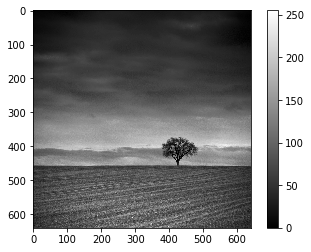

In [6]:
plt.figure(1)
plt.imshow(img_red, cmap='gray')
plt.colorbar()

Create a new NumPy array that is the subarray containing **only the tree** in
the image. Then **invert** the intensity values of the small subimage and call
the resulting array ``img_crop_inv``.

**Use slicing** to select the tree (get the coordinates by looking at the image)!

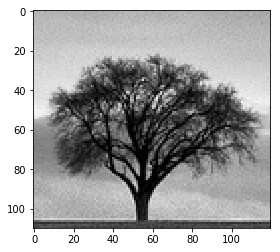

In [7]:
img_crop = img_red[350:460,370:490].copy()
img_crop.shape
plt.imshow(img_crop,cmap='gray')
plt.show()

Invert the image by subtracting from its maximum. You can find the maximum of ``img`` by
calling ``img.max()`` or ``np.max(img)``.

In [8]:
img_crop_inv = img_crop.max() - img_crop

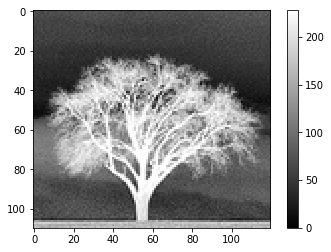

In [9]:
plt.figure(2)
plt.imshow(img_crop_inv, cmap='gray')
plt.colorbar()
plt.show()

**Apply a threshold to** ``img_red`` to make a binary image separating the tree from its background!

Define a threshold. You can check whether your threshold is appropriate by looking at the image colorbar!

In [10]:
threshold = 100

Thresholding is possible by a simple ``<`` or ``>`` sign and the threshold value. You do not have to explicitly loop over the image, the greater-than or less-than comparison is **performed for all pixels at once**, yielding a new array with the same size as the input array! 

In [11]:
img_binary = img_crop<100

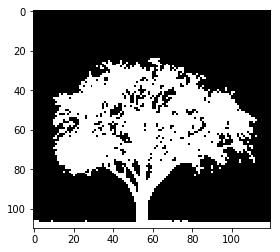

In [12]:
plt.figure(3)
plt.imshow(img_binary, cmap='gray')

Plot a vertical profile line through the tree of ``img_red``
**Select a column of the image via slicing.** Your result ``line_tree`` should be a
1D array of the shape ``(640,)``.

In [13]:
line_tree = img_red[:,320]
line_tree.shape

(640,)

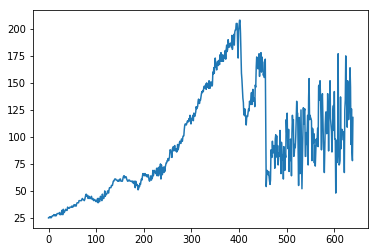

In [14]:
plt.figure(4)
plt.plot(line_tree)

Generate a $400 \times 400$ matrix ``img_seg`` that consists only of zeros:

In [15]:
img_seg = np.zeros((400, 400))
cs = img_crop.shape
ss = img_seg.shape

Place the subarray containing just the tree (``img_crop``) in the center of ``img_seg``:

In [16]:
img_seg[ss[0]//2 - cs[0]//2:ss[0]//2 + cs[0]//2,ss[1]//2 - cs[1]//2:ss[1]//2 + cs[1]//2] = img_crop

Have a look at img_seg with ``plt.imshow``:

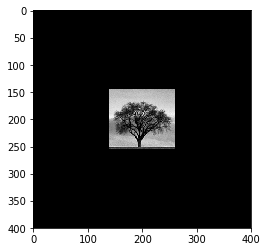

In [17]:
plt.figure(5)
plt.imshow(img_seg, cmap='gray')

Use the function ``scipy.ndimage.rotate`` (here called ``nd.rotate`` because of the way we named our imports) to **rotate ``img_seg`` by 45 degrees**.
Use ``nd.rotate?`` to see the function definition in IPython / IPython notebook or
``help(nd.rotate)`` in the Python interpreter -- or do the same from Spyder.

In [18]:
angle_rot = 45
img_rot = nd.rotate(img_seg,angle_rot)

Check that the shape of ``img_rot`` is the same as for img_seg, if not look at
the additional paramters of the ``nd.rotate`` function.

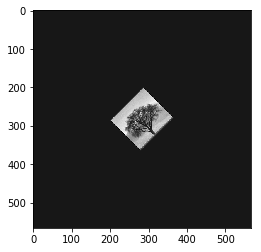

In [19]:
plt.figure(6)
plt.imshow(img_rot, cmap='gray')

## Explicit affine transformations

Use matrix transformations of pixel coordinates to reflect and rotate the image.
The following function helps you. The coordinate transform happens in the ``np.dot`` function.

In [20]:
def apply_matrix_transformation(img, trafo_matrix):
    """
    Applies a matrix transformation to the image pixel coordinates and returns
    the transformed image.
    
    Parameters
    ----------
    img : numpy.ndarray
        2D image to transform.
    trafo_matrix : numpy.ndarray
        A 2x2 transformation matrix to be applied to image coordinates.
    Returns
    -------
    img_new : numpy.ndarray
        Transformed 2D image.
    """
    # x and y represent the axis coordinates
    
    img_sh = img.shape
    
    x = np.arange(img_sh[1])
    y = np.arange(img_sh[0])

    # The function np.meshgrid creates coordinate arrays for x and y axis.
    # The variables xx and yy contain x, and y coordinate for every image pixel.
    coords = np.array(np.meshgrid(x, y)).reshape([2, -1])
    
    # The transformation is applied around the center
    coords[0] -= img_sh[1]//2
    coords[1] -= img_sh[0]//2

    # The np.dot function is the dot product (matrix/vector product).
    # The matrix transform is done for every pixel in this call
    # Possible operations: reflection, rotation, scaling, and sheering.
    coords_new = np.dot(trafo_matrix, coords)

    # Add again the image center as pythons image coordinates start with zero
    coords_new[0] += img_sh[1]//2
    coords_new[1] += img_sh[0]//2

    # The function interp2d can interpolate gridded data
    f_interp = inter.interp2d(x, y, img, kind='cubic')

    # Interpolate the new coordinates as e.g. rotation requires a grid change
    img_new = np.array([f_interp(xnew, ynew) for xnew, ynew in coords_new.T])
    
    return img_new.reshape(img_sh)

Create a $2 \times 2$ matrix that **reflects the x coordinates!**

In [21]:
reflection_matrix = np.array([[1,0],[0,-1]])

Apply the transformation:

In [22]:
img_refl = apply_matrix_transformation(img_seg, reflection_matrix)

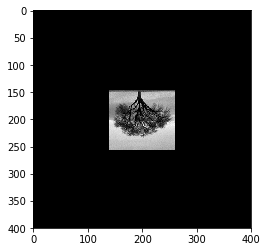

In [23]:
plt.figure(7)
plt.imshow(img_refl, cmap='gray')

Create a 2x2 matrix that **rotates counter-clockwise!** The NumPy functions ``np.sin`` and ``np.cos`` expect the angle in radian [0 to $2 \pi$ (i.e., ``2 * np.pi``)].

In [24]:
angle_rot_rad = angle_rot / 180. * np.pi
rotation_matrix = np.array([[np.cos(angle_rot_rad),-np.sin(angle_rot_rad)],[np.sin(angle_rot_rad),np.cos(angle_rot_rad)]])

Apply the transformation:

In [25]:
img_rot2 = apply_matrix_transformation(img_seg, rotation_matrix)

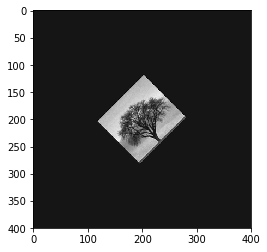

In [26]:
plt.figure(8)
plt.imshow(img_rot2, cmap='gray')